In [11]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path = "/home/bobby/Downloads/software/lab7-8/django/Results"

con_high = []
con_low = []
con_med = []
sev_high = []
sev_low = []
sev_med = []
loc = []

In [13]:
all_files = [i for i in os.listdir(path) if i.endswith(".json")]
for file in all_files:
    full_path = os.path.join(path, file)
    with open(full_path, 'r') as f:
        data = json.load(f)

        if 'results' in data and isinstance(data['results'], list):
            for r in data['metrics']:
                if '_totals' == r:
                    con_high.append(data['metrics'][r]['CONFIDENCE.HIGH'])
                    con_low.append(data['metrics'][r]['CONFIDENCE.LOW'])
                    con_med.append(data['metrics'][r]['CONFIDENCE.MEDIUM'])
                    sev_high.append(data['metrics'][r]['SEVERITY.HIGH'])
                    sev_low.append(data['metrics'][r]['SEVERITY.LOW'])
                    sev_med.append(data['metrics'][r]['SEVERITY.MEDIUM'])
                    loc.append(data['metrics'][r]['loc'])            

con_high = con_high[::-1]
con_low = con_low[::-1]
con_med = con_med[::-1]
sev_high = sev_high[::-1]
sev_low = sev_low[::-1]
sev_med = sev_med[::-1]

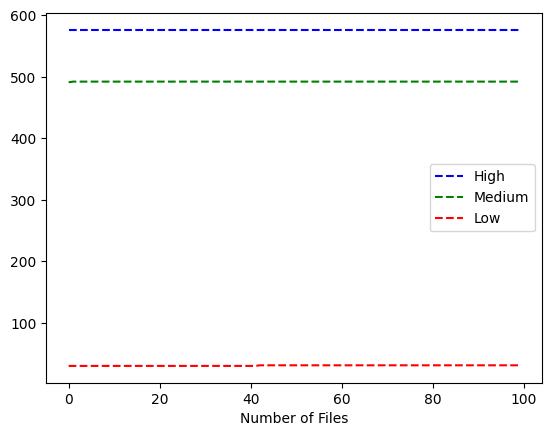

In [14]:
cx = np.array(con_high)
cy = np.array(con_med)
cz = np.array(con_low)

plt.plot(cx, linestyle='dashed', color='b', label='High')
plt.plot(cy, linestyle='dashed', color='g', label='Medium')
plt.plot(cz, linestyle='dashed', color='r', label='Low')

plt.xlabel('Number of Files')
plt.legend()
plt.show()  

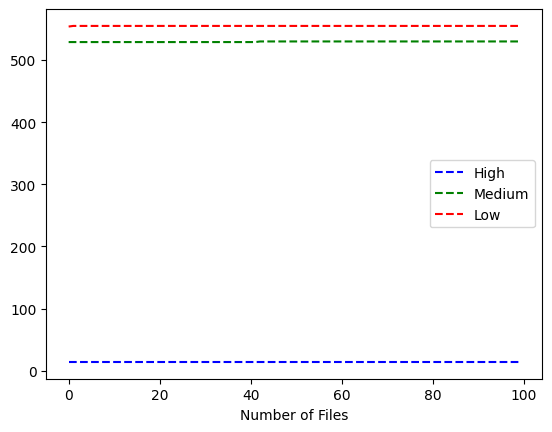

In [15]:
sx = np.array(sev_high)
sy = np.array(sev_med)
sz = np.array(sev_low)
plt.plot(sx, linestyle='dashed', color='b', label='High')
plt.plot(sy, linestyle='dashed', color='g', label='Medium')
plt.plot(sz, linestyle='dashed', color='r', label='Low')
plt.xlabel('Number of Files')
plt.legend()
plt.show()  

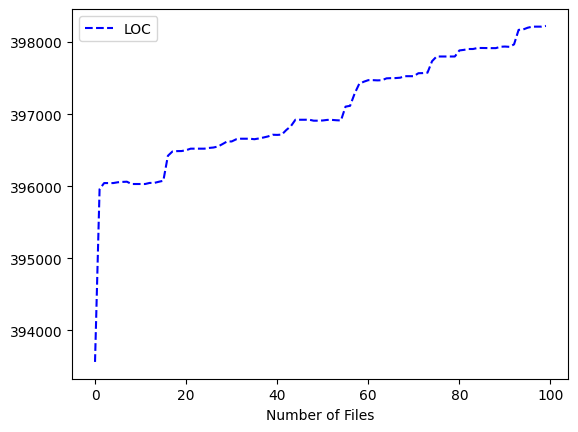

In [16]:
loc = loc[::-1]
loc_array = np.array(loc)
plt.plot(loc_array, linestyle='dashed', color='b', label='LOC')
plt.xlabel('Number of Files')
plt.legend()
plt.show()